## Introduction
The following paper is made with the purpose of using different statistics techniques to the understanding of Football. This is done by evaluating data from the last previous MLS Championships and more into detail over the performance of Atlanta United FC side, which became champions in the 2018 MLS season.

Football is a non Zero-sum game. This means there can be more than just two results (Drawing a game is possible), also, the fact that you get 3 points for every victory doesn't make the goal scoring of a team a perfect indicator of how good this side is. The more goals you score, you are still going to get the same 3 points. 

While for the defensive analysis I want to know if it's correlated with winning. Do you really need a Defense at all or should you center your efforts in just scoring more than your rivals? 


### Objectives

#### Finding good KPI's
I wanted to find the best success predictor for a Football team in the league. At first, Football might seem like a simple game, but its ramdomness makes it a very interesting game to analize statistically. I belive finding a good KPI to measure success of teams is crucial to understanding the game.

#### Goals win matches, but Defense get you Championships
Testing this coaching mantra using statistical analysis and data visualization to understand better how the Atlanta FC high defensive pressure was successfull and what is the best way to interpret the saying. 

## Data Cleaning and wrangling

In [4]:
#Importing the required libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
# Merging the data from the previous three seasons
MLS_east_last_3_seasons = pd.read_csv(r'Data/MLS_east_17-19.csv')
MLS_east_last_3_seasons.head()

,Rk,Squad,W,D,L,GF,GA,GDiff,Pts,Poss,...,Gls,Ast,PK,PKatt,CrdY,CrdR,G+A,G-PK,G+A-PK,Season
0,1,Toronto FC,20,9,5,74,37,37,69,51.8,...,2.09,1.38,7,11,44,1,3.47,1.88,3.26,2017
1,2,NYCFC,16,9,9,56,43,13,57,55.2,...,1.65,1.26,4,6,74,3,2.91,1.53,2.79,2017
2,3,Chicago,16,7,11,61,47,14,55,52.4,...,1.74,1.32,6,7,46,3,3.06,1.56,2.88,2017
3,4,Atlanta,15,10,9,70,40,30,55,57.6,...,2.03,1.56,4,4,63,5,3.59,1.91,3.47,2017
4,5,Columbus,16,6,12,53,49,4,54,52.0,...,1.56,1.24,4,6,51,4,2.79,1.44,2.68,2017


## Finding good KPI's

The slope is: 0.8994568074294725
The intercept is: 0.6107587173646394
2.4418606400919053e-08
The correlation is: 0.791821626915277
The covarience is: 91.50089126559716


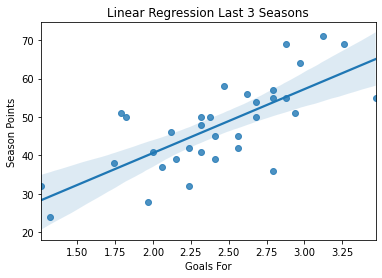

<Figure size 1728x720 with 0 Axes>

In [13]:
# Using Linnear Regression algorithm to test GF and Pts relation
slope, intercept, r_value, p_value, std_err = stats.linregress(MLS_east_last_3_seasons['GF'], MLS_east_last_3_seasons['Pts'])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print(p_value)
print ('The correlation is: ' + str(MLS_east_last_3_seasons['GF'].corr(MLS_east_last_3_seasons['Pts'])))
print ('The covarience is: ' + str(MLS_east_last_3_seasons['GF'].cov(MLS_east_last_3_seasons['Pts'])))
sns.regplot(x='G+A-PK', y='Pts' , data=MLS_east_last_3_seasons)
plt.title('Linear Regression Last 3 Seasons')
# Set x-axis label
plt.xlabel('Goals For')
# Set y-axis label
plt.ylabel('Season Points')
plt.figure(figsize = (24, 10))
plt.show()

From the figure above we can see there is the possibility to fit a direct linear relation between "Goals For" (GF) and "Points" (Pts).

We can see the correlation is pretty high at 0.79 and the pvalue is very low below the 5% of rejecting area.

We can say with a 95% of trust that for every Goal For scored by teams there is a positive change of 0.89 Points on average.

However, I think there's a better KPI or predictor of success of a team during the season and it comes by the KPI defined as "Goals + Assists - Penalty Kicks" (G+A-PK) per match. This KPI would come to say how good is a team at generating and scoring chances and not only an historic variable of success.

I tested it using the same Linnear Regression algorithm as for GF and found out it was a better way of measuring a team's success as explained below:

The slope is: 16.639558467018286
The intercept is: 7.354857394423078
7.203533510716961e-07
The correlation is: 0.7355518090040507
The covarience is: 4.268110516934047


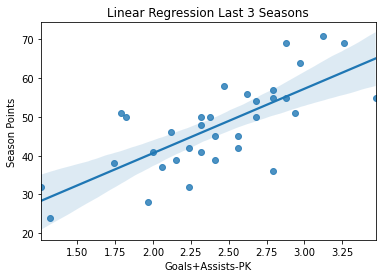

<Figure size 1728x720 with 0 Axes>

In [14]:
# Using linnear regression to test 'G+A-PK' and 'Pts' relation
slope, intercept, r_value, p_value, std_err = stats.linregress(MLS_east_last_3_seasons['G+A-PK'], MLS_east_last_3_seasons['Pts'])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print(p_value)
print ('The correlation is: ' + str(MLS_east_last_3_seasons['G+A-PK'].corr(MLS_east_last_3_seasons['Pts'])))
print ('The covarience is: ' + str(MLS_east_last_3_seasons['G+A-PK'].cov(MLS_east_last_3_seasons['Pts'])))
sns.regplot(x='G+A-PK', y='Pts' , data=MLS_east_last_3_seasons)
plt.title('Linear Regression Last 3 Seasons')
# Set x-axis label
plt.xlabel('Goals+Assists-PK')
# Set y-axis label
plt.ylabel('Season Points')
plt.figure(figsize = (24, 10))
plt.show()

From the figure above we can conclude that with a 95% confidence we can say that for every unit of "Goals + Assist - Penalty Kicks" per 90 minutes a team gains, on average it will gain 16.6 Points. 

We can see there's also a very high correlation of 0.73 and we can also see a lowe covariance in comparison with the previous graph. 

## Goals win matches, but defense wins championhips

In [20]:
# Gen Stats For 2018
MLS2018_GenStats = pd.read_json("Data/2018_GenStats.jscsrc")
MLS2018_GenStats

,Squad,Poss,MP,Gls,Ast,PK,PKatt,CrdY,CrdR,G+A,G-PK,G+A-PK
0,Atlanta,54.0,34,1.97,1.26,12,14,60,3,3.24,1.62,2.88
1,Chicago,47.7,34,1.35,0.97,3,4,62,3,2.32,1.26,2.24
2,Colorado,45.4,34,1.00,0.68,3,5,90,6,1.68,0.91,1.59
3,Columbus,52.7,34,1.21,0.76,6,7,48,3,1.97,1.03,1.79
4,D.C. United,47.7,34,1.74,1.32,4,5,42,2,3.06,1.62,2.94
5,FC Dallas,48.7,34,1.47,1.09,4,6,51,4,2.56,1.35,2.44
6,Houston,48.2,34,1.71,1.06,4,4,69,7,2.76,1.59,2.65
7,LA Galaxy,48.7,34,1.94,1.53,5,5,71,3,3.47,1.79,3.32
8,Los Angeles FC,53.1,34,1.91,1.32,4,5,42,4,3.24,1.79,3.12
9,Minnesota,45.5,34,1.41,0.97,1,1,72,7,2.38,1.38,2.35


In [22]:
# 2018 standings eastern conference
MLS2018_east_standings = pd.read_json("Data/2018_east_standings.jscsrc")
MLS2018_east_standings

,Rk,Squad,W,D,L,GF,GA,GDiff,Pts
0,1,NY Red Bulls,22,5,7,62,33,29,71
1,2,Atlanta,21,6,7,70,44,26,69
2,3,NYCFC,16,8,10,59,45,14,56
3,4,D.C. United,14,9,11,60,50,10,51
4,5,Columbus,14,9,11,43,45,-2,51
5,6,Philadelphia,15,5,14,49,50,-1,50
6,7,Montreal,14,4,16,47,53,-6,46
7,8,New England,10,11,13,49,55,-6,41
8,9,Toronto FC,10,6,18,59,64,-5,36
9,10,Chicago,8,8,18,48,61,-13,32


In [27]:
# Merging both data sets and then the Defensive stats
MLS2018 = MLS2018_east_standings.merge(MLS2018_GenStats)
MLS2018_DefStats = pd.read_json("Data/2018_DefStats.jscsrc")
MLS_Def_East = MLS2018_DefStats.merge(MLS2018)
MLS_Def_East = MLS_Def_East.drop(columns=['MP'])
MLS_Def_East

,Squad,Tkl,TklW,Def 3rd tk,Mid 3rd tk,Att 3rd tk,Tkl%,Press,Succ,Press%,...,Poss,Gls,Ast,PK,PKatt,CrdY,CrdR,G+A,G-PK,G+A-PK
0,Atlanta,561,352,296,193,72,32.2,3576,972,27.2,...,54.0,1.97,1.26,12,14,60,3,3.24,1.62,2.88
1,Chicago,584,345,312,213,59,37.7,5854,1368,23.4,...,47.7,1.35,0.97,3,4,62,3,2.32,1.26,2.24
2,Columbus,491,335,263,164,64,35.8,4880,1305,26.7,...,52.7,1.21,0.76,6,7,48,3,1.97,1.03,1.79
3,D.C. United,507,322,283,168,56,33.6,5099,1222,24.0,...,47.7,1.74,1.32,4,5,42,2,3.06,1.62,2.94
4,Montreal,572,384,312,199,61,35.6,5702,1485,26.0,...,47.6,1.32,0.97,6,6,47,3,2.29,1.15,2.12
5,New England,584,363,286,224,74,32.6,5640,1497,26.5,...,48.5,1.41,1.00,3,5,83,4,2.41,1.32,2.32
6,NY Red Bulls,655,403,270,281,104,33.6,5950,1796,30.2,...,48.9,1.79,1.44,4,6,54,2,3.24,1.68,3.12
7,NYCFC,589,404,291,215,83,31.6,5000,1457,29.1,...,58.9,1.68,1.03,3,4,61,4,2.71,1.59,2.62
8,Orlando City,615,406,342,184,89,35.9,5053,1350,26.7,...,49.9,1.21,0.91,5,7,68,5,2.12,1.06,1.97
9,Philadelphia,519,352,252,203,64,31.6,4710,1187,25.2,...,50.0,1.44,1.03,5,7,60,4,2.47,1.29,2.32


In [31]:
# Generating the correlation matrix 
DEF_CORR = MLS_Def_East.corr()
DEF_CORR2 = DEF_CORR.loc[['Press%','PressDef 3rd','PressMid 3rd','PressAtt 3rd', 'Int', 'GF', 'Pts', 'G+A-PK'],
                         ['Press%','PressDef 3rd','PressMid 3rd','PressAtt 3rd', 'Int', 'GF', 'Pts', 'G+A-PK']]
DEF_CORR2

,Press%,PressDef 3rd,PressMid 3rd,PressAtt 3rd,Int,GF,Pts,G+A-PK
Press%,1.000000,-0.472154,0.117178,0.394353,0.209037,0.390845,0.522469,0.360292
PressDef 3rd,-0.472154,1.000000,0.578392,-0.032626,0.440895,-0.413676,-0.593425,-0.223642
PressMid 3rd,0.117178,0.578392,1.000000,0.662411,0.734699,-0.296170,-0.266341,-0.020165
PressAtt 3rd,0.394353,-0.032626,0.662411,1.000000,0.272490,-0.155055,-0.024360,0.114364
Int,0.209037,0.440895,0.734699,0.272490,1.000000,-0.153645,0.084365,0.022072
GF,0.390845,-0.413676,-0.296170,-0.155055,-0.153645,1.000000,0.689325,0.921850
Pts,0.522469,-0.593425,-0.266341,-0.024360,0.084365,0.689325,1.000000,0.593403
G+A-PK,0.360292,-0.223642,-0.020165,0.114364,0.022072,0.921850,0.593403,1.000000


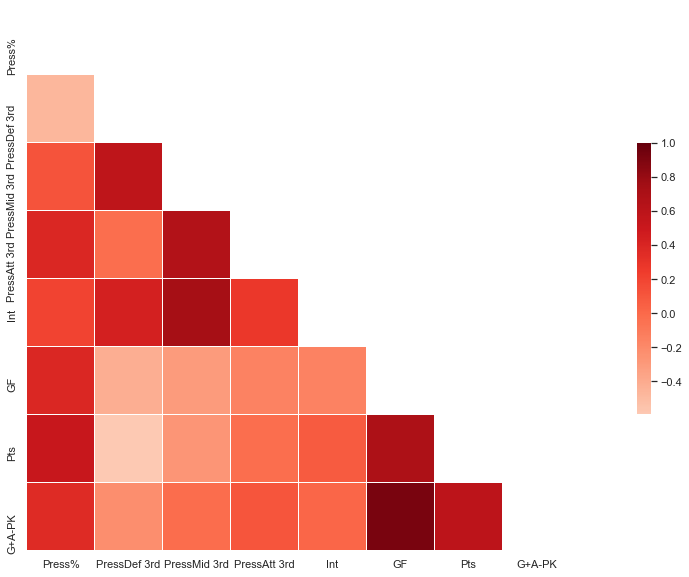

In [30]:
# Generate a custom diverging colormap
plt.figure(figsize = (24, 10))
sns.set(style = 'white')
mask = np.zeros_like(DEF_CORR2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(200, 100 , as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(DEF_CORR2, mask=mask, cmap='Reds', vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From the figure above we can see there's a medium positive correlation between the attacking pressure and the 'G+A-PK' (0.39) and 'Pts'(0.52). Which indeed helps me answer the question if Defense plays a special part along the season into winning a championship.

From the graph we can see how 'Interceptions' also are very positively correlated with pressure in the 3 different 3rds of the football field. We see how exercizing that defensive pressure in the defensive 3rd is the riskiest, while doing it so in the attacking and midfield 3rds are almost the same risk.

In theory the more you supress your rivals ability to play the ball through defensive pressure the more you are likely to become the winning side. 

We now have another KPI (this time defensive) to analyze as predictor of sucess.

Now let's analyze through two other graphics how Atlanta FC performed in this aspect of the game.

## Defensive Pressure Comparison MLS2018
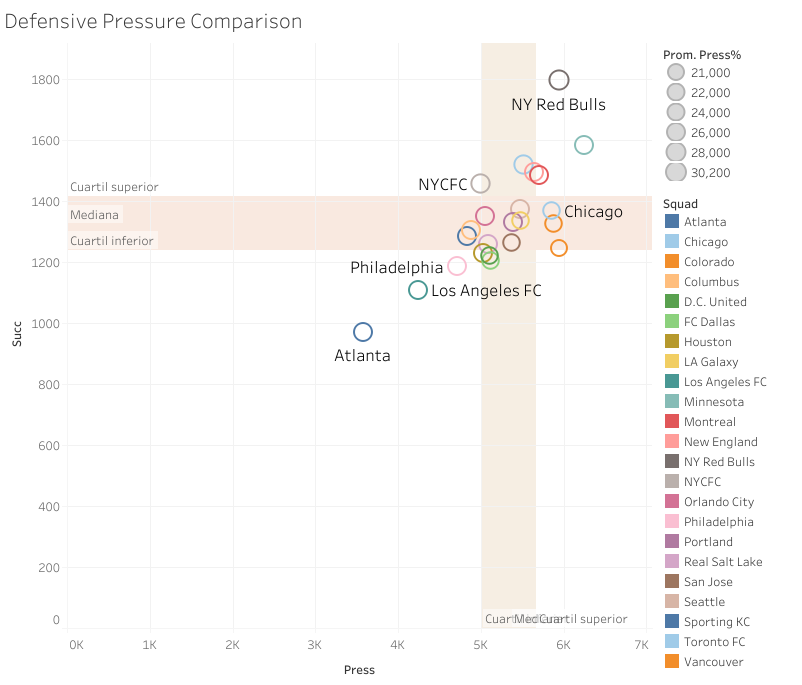

From the above graph we can see how all the teams in the MLS2018 performed in regards of 'Pressure Attemps' and 'Successful Pressure Attemps'.

The red areas represent the percentiles of each variable. So if a team is below or above the red areas is underperforming or overperforming respectively in comparison with the rest of the league average.

We clearly see New York Red Bull as the leaders with Kansas City in the second place.

We see Atlanta underperforming. But what would be the result in relative terms? 

## Pressure Effectivenes
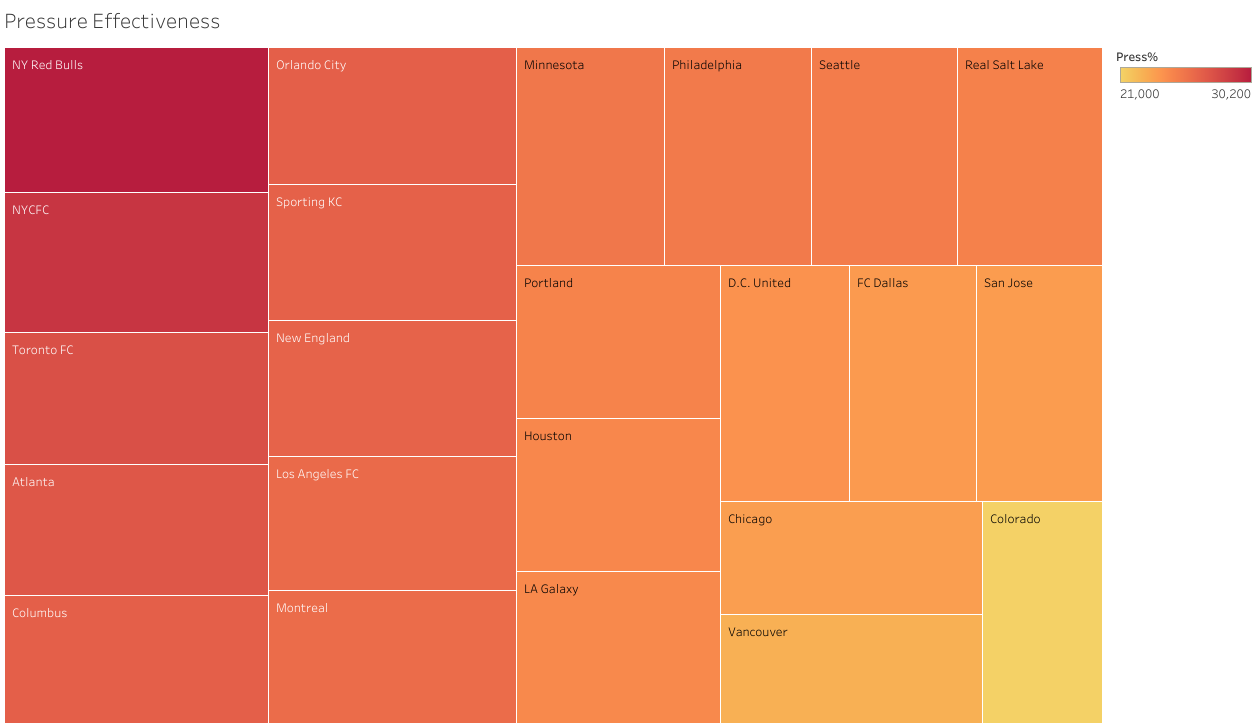

From the graph above we see how effective where the teams in terms of 'Successful Attemps / Pressure Attemps' and now we can see how Atlanta is on the 4th spot.

This graph says which teams are the best at retrieving the ball, and since Atlanta was the last team into attemps from the previous graph we could say that its effectiveness at reading the game let their defense to minimize risks when performing such action. Driving them to have a more solid defensive side. 

The next graph compares the possession between teams in the league, and we can see how well Atlanta performs:

## 2018 MLS Possession ranks
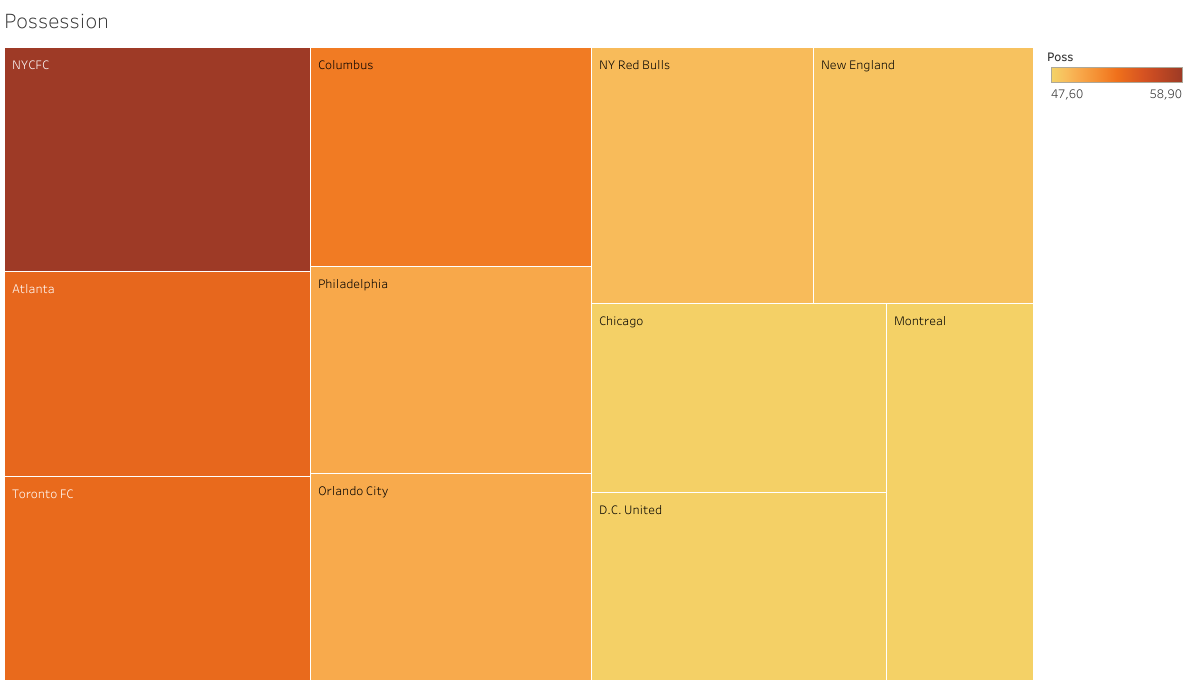

Atlanta was second at the Eastern Conference where its direct rivals "New York City Red Bulls" were 7th. We could affirm that their ability to retrieve the ball fast and keeping it in play was key to Atlanta FC building their 2018 Championship.

With these graphs we can see how clearly Gerardo Martino's tactics where interpreted by his side and also how superior they looked not only in paper but on the field to make them achieve 2018 MLS glory.

## Conclusion

1. Finding good KPI's
We have seen how its not so simple to analyze a game in which every second there's something happening on the field. The effectiveness of an analysis is closely related to how good it is our understanding of the game concepts, which will lead us to select the most appropiate variables to measure and testing them using statistic concepts and algorithms allows us to discover insights that differentiate our decission making processes.

2. Goals win matches, but Defense get you Championships
Through correlations we could test how variables are related to each other and the strength of these relations. It can be used to help us test and analyze the effectiveness and incidence of different tactics over the results of the game in the long term.